In [ ]:
from glob import glob
import numpy as np
import pandas as pd

from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split

In [ ]:
all_data = []

In [ ]:
for path in tqdm_notebook(glob('./binary/*.npz')):
    file = np.load(path)
    tag = file['tag'][0]
    file.close()
    
    all_data.append({"path": path, "tag": tag})

In [ ]:
df = pd.DataFrame(all_data)

In [ ]:
df.to_csv('binary.csv')

In [ ]:
df.tag.value_counts()

0    35876
1     1113
Name: tag, dtype: int64

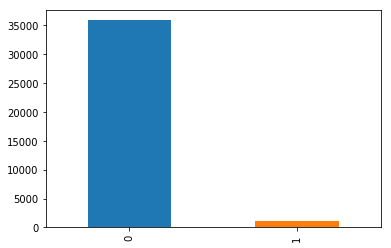

In [ ]:
df.tag.value_counts().plot(kind='bar')

In [ ]:
final_df = df[df.tag == 0].sample(1113).append(df[df.tag == 1])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_df.path, final_df.tag, stratify=final_df.tag, test_size= 0.2, random_state=101)

In [ ]:
final_df['subset'] = final_df.path.copy()

In [ ]:
final_df.subset[~final_df.subset.isin(X_train)] = 'test'
final_df.subset[final_df.subset.isin(X_train)] = 'train'

D:\Programas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Programas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
final_df

,path,tag,subset
12428,./binary\21182.npz,0,train
228,./binary\10201.npz,0,test
10652,./binary\19585.npz,0,train
10794,./binary\19712.npz,0,test
159,./binary\1014.npz,0,train
5413,./binary\1487.npz,0,test
25125,./binary\3261.npz,0,train
12398,./binary\21155.npz,0,train
8882,./binary\17992.npz,0,train
13019,./binary\21714.npz,0,train


In [ ]:
final_df.to_csv('./binary_sampled.csv')